#### selenium 패키지 모듈 이용한 자동 크롤링
- selenium
    - webdriver라는 API를 통해 운영체제에 설치된 웹 브라우저를 제어하는 함수를 포함한 패키지
    - 써드파티라이브러리이기 때문에 설치 해 줘야 함
    - prompt 에서 설치
        - pip install selenium

In [3]:
# 노트북에서 패키지 설치
# !pip install --user selenium

  Using cached selenium-4.3.0-py3-none-any.whl (981 kB)
  Using cached urllib3-1.26.11-py2.py3-none-any.whl (139 kB)
  Using cached trio_websocket-0.9.2-py3-none-any.whl (16 kB)

ERROR: requests 2.24.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.11 which is incompatible.



  Using cached wsproto-1.1.0-py3-none-any.whl (24 kB)
  Using cached h11-0.13.0-py3-none-any.whl (58 kB)


In [1]:
# 패키지 임포트
import selenium
from selenium import webdriver
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By

- selenium은 브라우저를 컨트롤하는 기능이기 때문에 webdriver 프로그램을 사용
    - webdriver는 브라우저 종류에 따라 브라우저 제작 업체에서 제공
    
### 크롬드라이버 다운로드
- https://chromedriver.chromium.org/downloads

### 크롬 버전 확인
- 메뉴 - 도움말 - 크롬정보

**공식site : https://www.selenium.dev/documentation/webdriver/getting_started/upgrade_to_selenium_4/**
### 관련 메서드
- get(url) : url에 접근하는 메서드
- 셀레이움 버전 up으로 인해 문법변경

- from selenium.webdriver.common.by import By
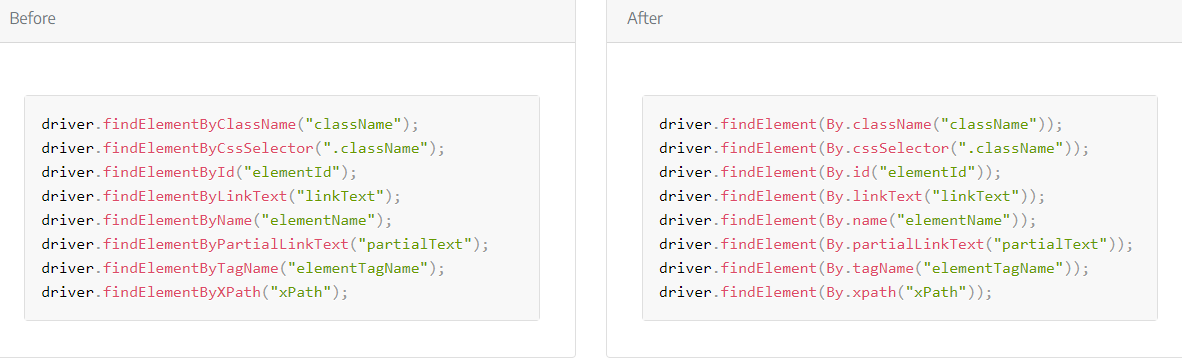 <br>

- findElement() : 코드에서 조건에 맞는 태그 중 처음 나오는 태그(find)
- findElements() : 코드에서 조건에 맞는 모든 태그(findAll) <br>

### 단,  By를 제외한 나머지 속성명은 모두 대문자로 사용<br>
    - ex)By.TAGNAME <br>


- Webdriver 객체 생성
    * driver = webdriver.Chrome(드라이버경로)

- 접근한 페이지 source 추출
    * html=diver.page_source

In [11]:
# 1. webdriver 객체 생성 
driver = webdriver.Chrome('./driver/chromedriver') # driver가 저장되어 있는 경로

<ipython-input-11-cfb9d2a3dfbc>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedriver') # driver가 저장되어 있는 경로


In [12]:
# 페이지 접근
url = 'https://nid.naver.com/nidlogin.login'
driver.get(url)

In [4]:
# driver를 통해 화면 캡쳐
driver.save_screenshot('./crawl_data/sshot.png')

True

### 동적 로그인 진행

In [6]:
# id 값 전달
# id 입력하는 input box 찾기
id_elem = driver.find_element(By.ID,'id')
type(id_elem)

selenium.webdriver.remote.webelement.WebElement

In [7]:
# id 입력 input box 기존 값 지우기
id_elem.clear() # webelemnt 객체인 id_elem의 기존 data 삭제
# id 값 전달
id_elem.send_keys('아이디') # webelemnt 객체인 id_elem으로 data 전송

In [8]:
# 비밀번호 입력  input box 찾기
pw_elem = driver.find_element(By.ID,'pw')
pw_elem.clear()
pw_elem.send_keys('패스워드')

In [9]:
# 로그인 버튼 클릭
xpath = '//*[@id="log.login"]'
#로그인 버튼을 찾아서 클릭
driver.find_element(By.XPATH,xpath).click() # 셀레니움 클릭함수

# 자동입력 방지 문자가 나타남
# send_keys() 함수 사용 - 봇으로 인식

# => 파이썬 코드가 아니라 자바스크립트 코드를 보내야 봇으로 인식하지 않음

In [25]:
# 자동입력 방지 문자 우회
# script 코드 작성
id_input = '아이디'
pw_input = '비밀번호'
# script 코드
"document.getElementsByName('id')[0].value=\'"+ id_input + "\'"
"document.getElementsByName('pw')[0].value=\'"+ pw_input + "\'"

"document.getElementsByName('pw')[0].value='비밀번호'"

In [16]:
# 자동입력 방지 문자 우회하기위해 브라우저 종료 후 다시 접속
driver = webdriver.Chrome('./driver/chromedriver')
url ='https://nid.naver.com/nidlogin.login' 
driver.get(url)

<ipython-input-16-ea4ca62bb979>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedriver')


### webdriver 통해 script 코드 직접 실행
- driver.execute_script() 함수 - driver로 script 코드를 직접 실행

In [18]:
driver.execute_script("document.getElementsByName('id')[0].value=\'"+id_input+"\'")

In [19]:
driver.execute_script("document.getElementsByName('pw')[0].value=\'"+ pw_input + "\'")

In [20]:
# 로그인 버튼 클릭
xpath = '//*[@id="log.login"]'
#로그인 버튼을 찾아서 클릭
driver.find_element(By.XPATH,xpath).click() # 셀레니움 클릭함수

In [21]:
# 메일 페이지로 접근
driver.get('https://mail.naver.com')

In [22]:
# 코드 추출
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')

In [ ]:
soup

In [24]:
# 드라이버 연결 끊기
driver.close()